- 채굴은 크랜잭션들을 모아 블록을 생성하는 행위이며, 선택한 트랜잭션들의 유효성을 일일이 검증하고 수수료를 집계한 후, 트랜잭션을 한데 모아 블록 바디를 구성
- 채굴자는 머클루트를 계산하여 블록의 헤더에 기록
- 생성된 블록의 이전 해시 값도 계산하여 블록 헤더에 기록

- ASIC (Applicaiton Specific Integrated Circuit)
: 일반적인 집적회로와 달리 특정한 용도에 맞도록 주문에 따라 제작된 주문형 시스템 반도체


[블록바디 구성] -> [머클루트 계산] -> [논스=0] -> [블록헤더 생성]

->[블록헤더 해시 계산] -> [비츠 조건 비교] -> [논스 ++] -> [블록 헤더 변경]  <<반복>>

->[블록헤더 해시 계산] -> [비츠 조건 비교] -> [채굴 성공]

In [ ]:
# lastest 100 block 읽고, coinbase transaction을 읽어서 
# 출력부에 기록된 채굴자의 wallet addr를 수집하여 check  


#722278 : 2022-02-08 03:39:06	12dRugNcdxK39288NjcDV4GX7rMsKCGn6B	6.319547
#722278 : 2022-02-08 03:30:08	19dENFt4wVwos6xtgwStA6n8bbA57WCS58	6.350122
#722278 : 2022-02-08 03:12:17	19dENFt4wVwos6xtgwStA6n8bbA57WCS58	6.285573
#722278 : 2022-02-08 03:08:08	1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY	6.340499
#722278 : 2022-02-08 02:56:44	12dRugNcdxK39288NjcDV4GX7rMsKCGn6B	6.291487
#722278 : 2022-02-08 02:51:10	12dRugNcdxK39288NjcDV4GX7rMsKCGn6B	6.389600
#722278 : 2022-02-08 02:45:22	3Qqp7LwxmSjPwRaKkDToysJsM3xA4ThqFk	6.413952
#722278 : 2022-02-08 02:22:13	1JvXhnHCi6XqcanvrZJ5s2Qiv4tsmm2UMy	6.434601
#722278 : 2022-02-08 01:52:08	19dENFt4wVwos6xtgwStA6n8bbA57WCS58	6.349470
#722278 : 2022-02-08 01:35:48	1GNgwA8JfG7Kc8akJ8opdNWJUihqUztfPe	6.337311
#722278 : 2022-02-08 01:22:59	19dENFt4wVwos6xtgwStA6n8bbA57WCS58	6.381174
#722278 : 2022-02-08 01:02:56	1JvXhnHCi6XqcanvrZJ5s2Qiv4tsmm2UMy	6.260508
#722278 : 2022-02-08 01:01:23	18cBEMRxXHqzWWCxZNtU91F5sbUNKhL5PX	6.257282
#722278 : 2022-02-08 01:01:08	1KFHE7w8

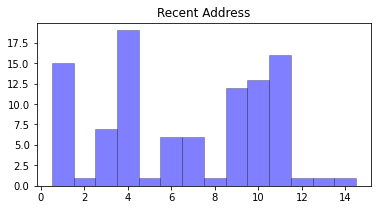

In [1]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

# 마지막 block 번호 조회 
resp = requests.get(url='https://blockchain.info/latestblock')
data = resp.json()
nH = data['height']

# 최근 몇 개 블록을 읽어서 coinbase transaction의 지갑 주소를 수집
m= []

for i in range(nH, nH-100, -1):
    url= 'https://blockchain.info/block-height/' + str(i) + '?format=json'
    resp= requests.get(url=url)
    data= resp.json() # json data에서 block을 꺼내오고
    block= data['blocks'][0]
    
    stime= block['time'] # 시간
    if block['tx'][0]['out'][0].get('addr'):
        addr= block['tx'][0]['out'][0]['addr'] # 주소
    else:
        addr= 'empty'
    value= block['tx'][0]['out'][0]['value'] # 수수료
    
    ts= time.gmtime(stime)
    date= time.strftime('%Y-%m-%d %H:%M:%S', ts)
    
    # 결과를 list에 저장 
    m.append([date,addr,value])
    
    # 과정 표시
    print('#%d : %s\t%s\t%f' %(nH, date, addr, value*1e-8))
    
# 결과 dataframe에 저장
df= pd.DataFrame(m, columns=['Date','Address','Reward'])

# 같은 지갑끼리 그룹
grp= df.groupby('Address').Address.count()
print()
print(grp)

# 시각화
plt.figure(figsize=(6,3))
plt.title('Recent Address')
x= list(range(1, len(grp.values)+1))
plt.bar(x, grp.values, width=1, color='blue', edgecolor='black', linewidth=0.5, alpha=0.5)
plt.show()